In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# check missing values

In [4]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
#fill null values

for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i] = df[i].fillna(df[i].mode()[0])

In [10]:
#check null values
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

We removed all null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

All columns contain categorical data except CGPA contains continuous numerical data

In [13]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [17]:
df['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

# Data Visualization

In [22]:
group = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


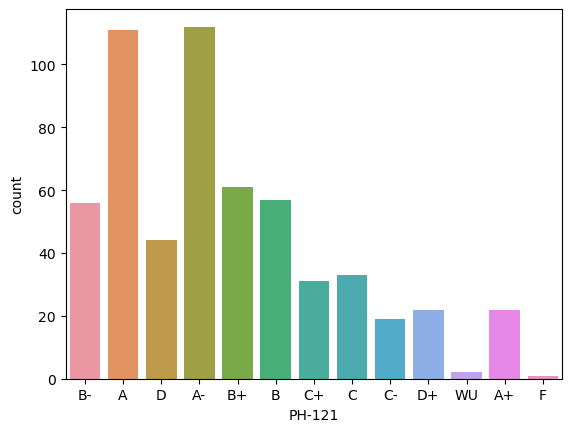

A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


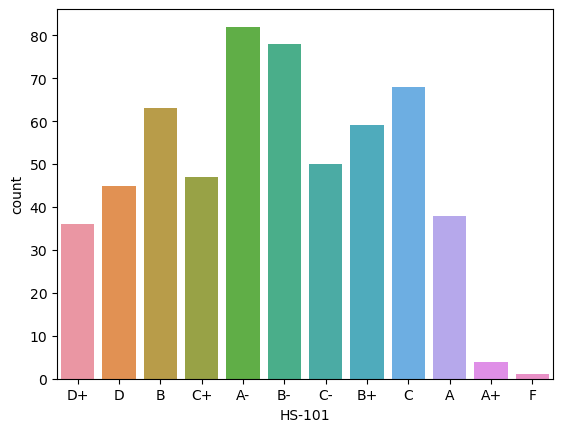

A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


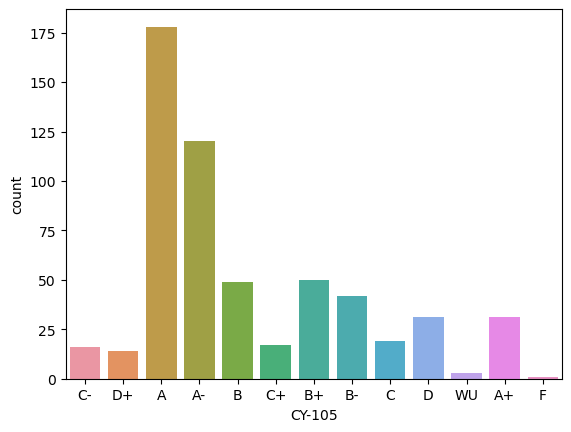

A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


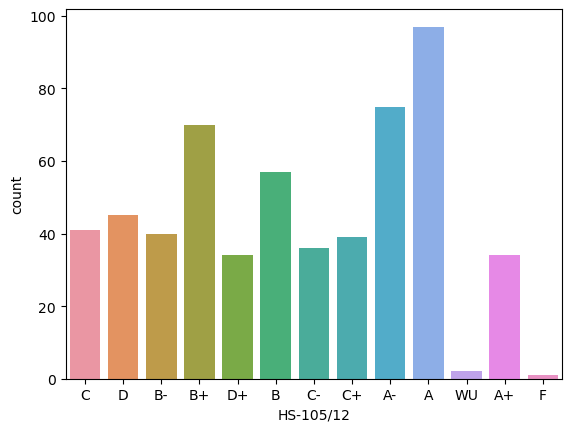

A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


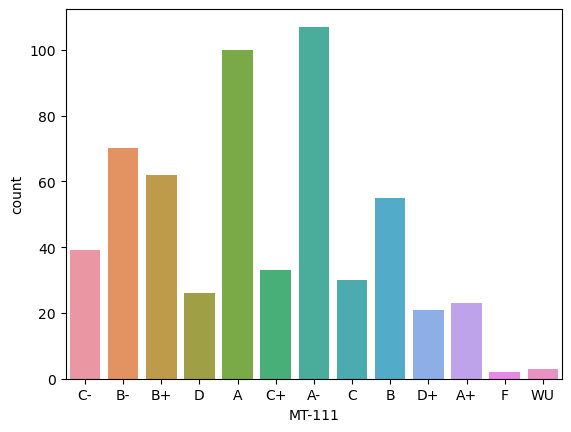

A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


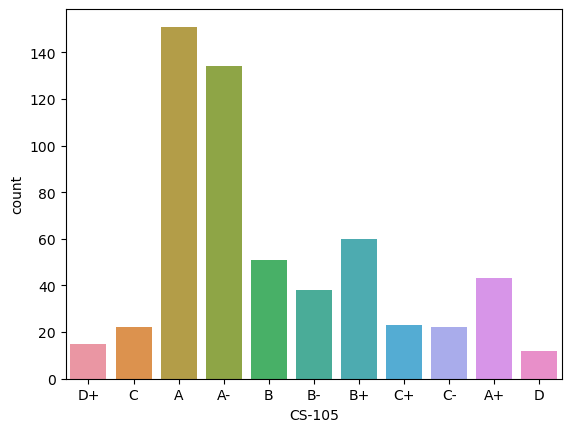

A-    118
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
WU      2
F       1
Name: CS-106, dtype: int64


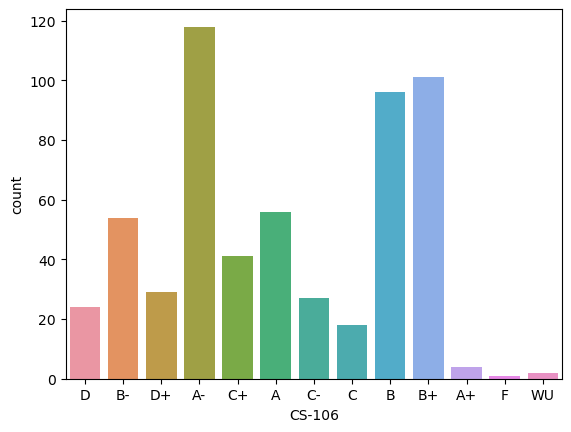

A-    107
A      92
B+     69
B      59
B-     53
D      38
C+     35
C-     32
C      30
A+     29
D+     23
WU      3
F       1
Name: EL-102, dtype: int64


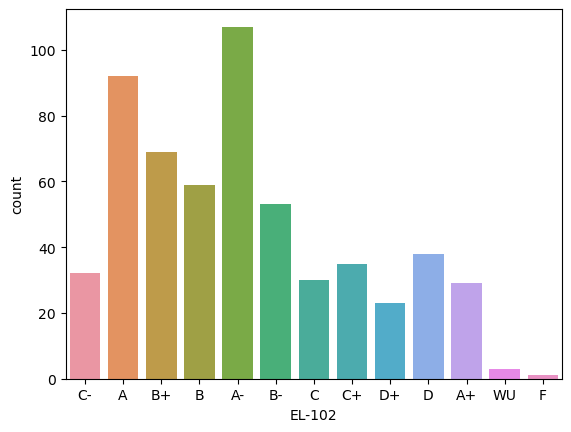

A-    139
B+     83
B      77
A      68
B-     48
C      48
C+     38
D+     26
C-     26
D      11
A+      6
WU      1
Name: EE-119, dtype: int64


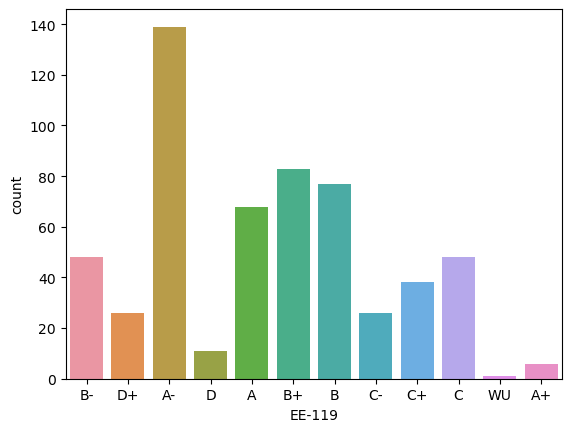

A-    81
A     77
B+    68
D     56
B-    56
B     50
C     49
C-    48
C+    37
D+    37
A+     8
WU     2
F      2
Name: ME-107, dtype: int64


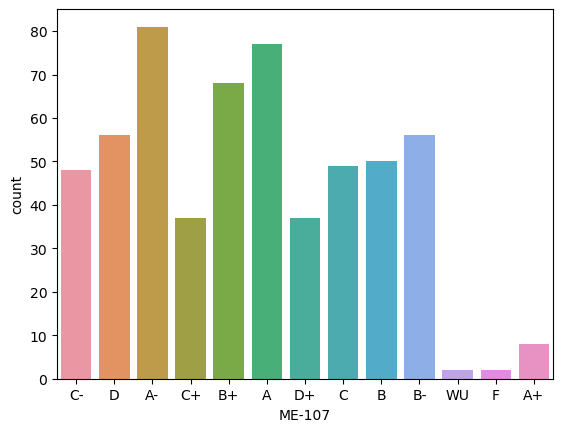

A     107
A-     81
B+     57
B      55
C-     49
B-     43
A+     42
D      38
C+     34
D+     31
C      30
WU      2
I       1
F       1
Name: CS-107, dtype: int64


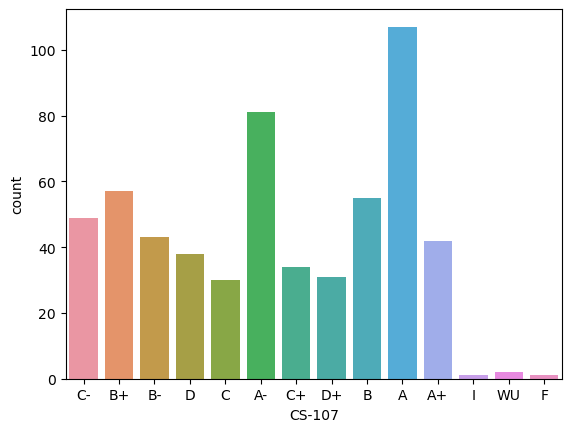

A-    155
A     118
B      97
B+     89
B-     36
C+     33
C      15
C-     11
D+      9
D       3
A+      2
F       2
WU      1
Name: HS-205/20, dtype: int64


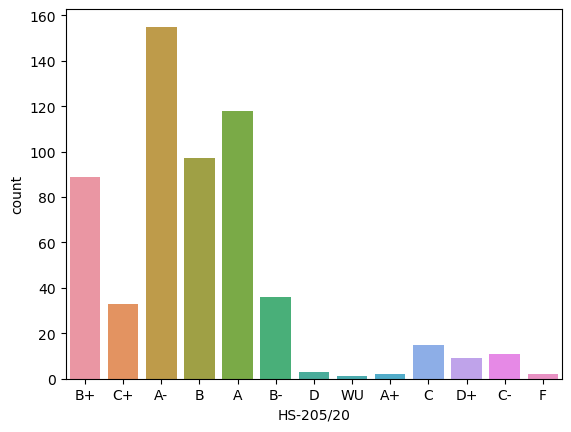

A-    91
A     80
D     66
B     61
B-    52
D+    46
C     43
B+    42
C+    39
C-    30
A+    16
F      3
WU     1
W      1
Name: MT-222, dtype: int64


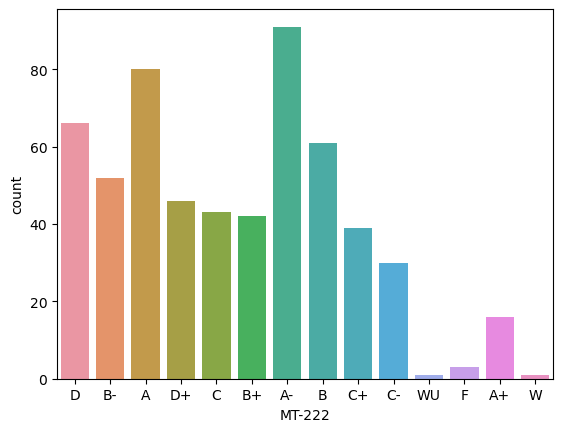

A     129
A-    121
B+     65
B      53
C      39
B-     35
A+     32
C+     29
D      25
D+     21
C-     16
F       4
W       2
Name: EE-222, dtype: int64


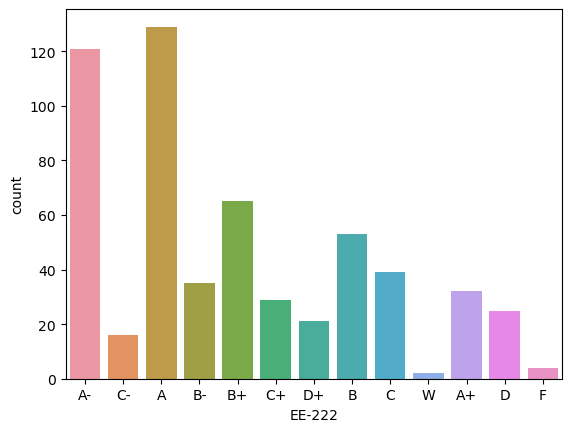

A-    127
A      80
B+     65
B      57
B-     49
C-     43
C+     39
D+     37
D      31
C      30
A+     10
WU      1
W       1
F       1
Name: MT-224, dtype: int64


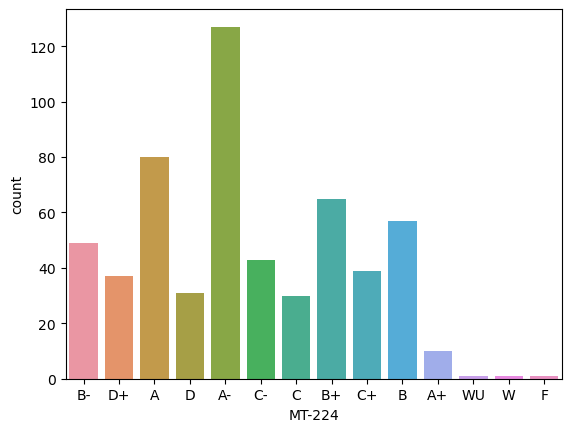

A-    140
A     101
B+     84
B      59
B-     58
C      30
C+     27
C-     24
D+     21
D      12
A+     12
WU      1
W       1
F       1
Name: CS-210, dtype: int64


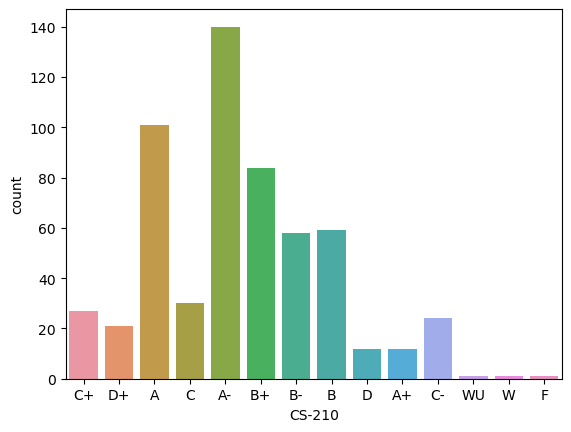

A-    73
A     67
B-    60
D+    56
B+    56
B     56
C+    55
C-    50
C     39
D     33
A+    21
F      3
WU     1
W      1
Name: CS-211, dtype: int64


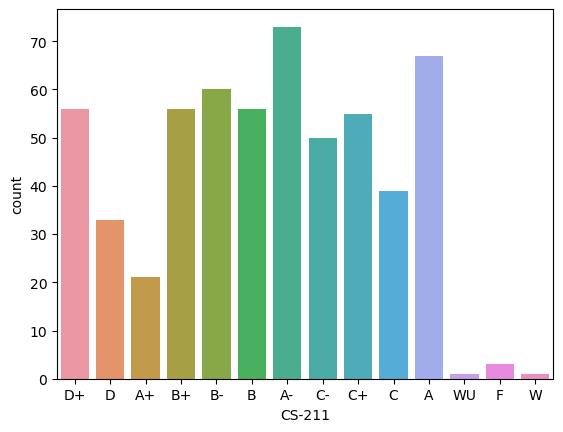

A-    93
A     81
B     66
C+    62
B+    59
B-    53
D+    39
C     35
C-    35
D     30
A+    15
F      2
I      1
Name: CS-203, dtype: int64


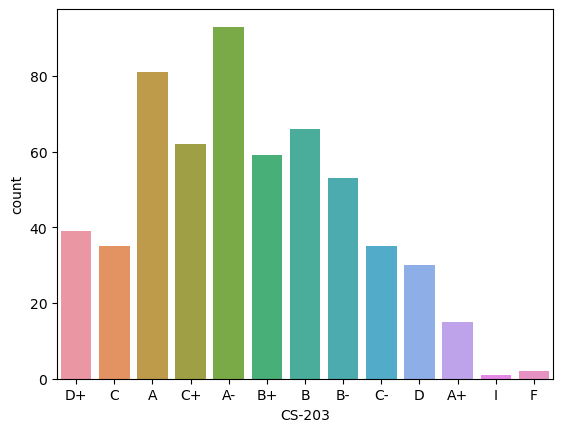

C     82
A-    73
B     63
C-    57
B-    56
A     56
D+    47
C+    46
B+    45
D     31
A+    12
F      2
I      1
Name: CS-214, dtype: int64


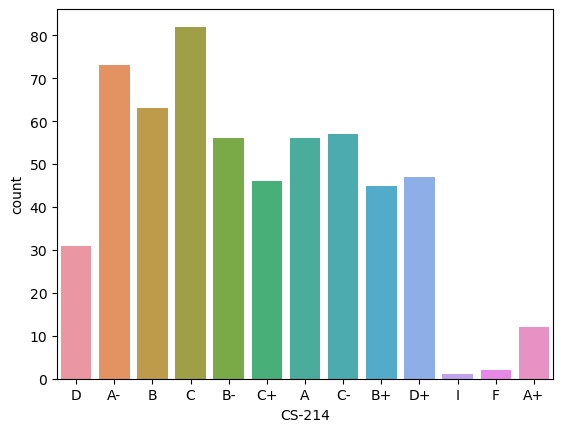

A-    143
A      97
B+     70
B      63
B-     57
C      36
C+     29
A+     22
C-     20
D+     19
D      12
F       2
WU      1
Name: EE-217, dtype: int64


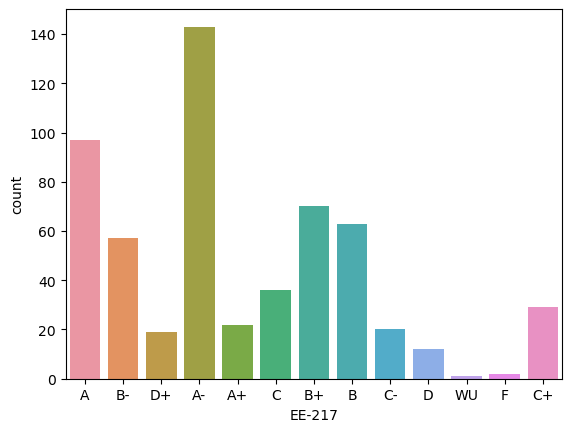

A-    107
B+     86
B      81
B-     65
C      44
A      43
D+     36
C+     35
C-     35
D      33
A+      4
WU      2
Name: CS-212, dtype: int64


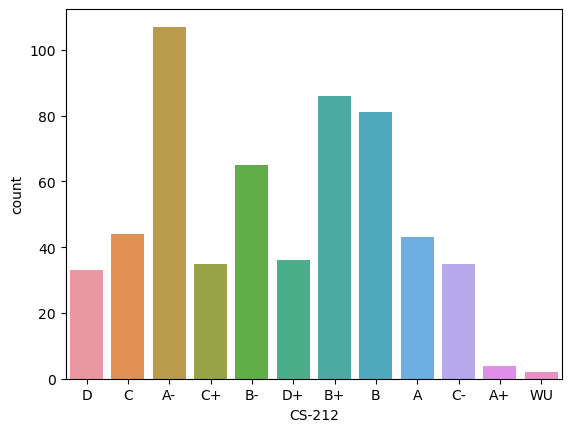

A-    85
A     68
B     64
B-    59
C+    50
B+    50
C     48
C-    47
D     42
D+    38
A+    17
WU     1
W      1
F      1
Name: CS-215, dtype: int64


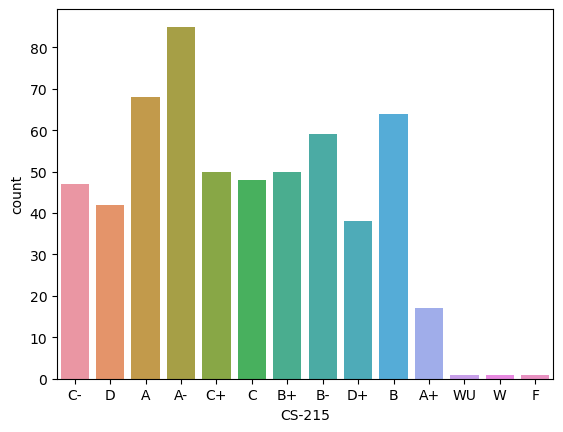

A     127
A-    103
B+     64
B      57
B-     46
C-     32
D+     31
A+     30
C      28
C+     27
D      22
F       4
Name: MT-331, dtype: int64


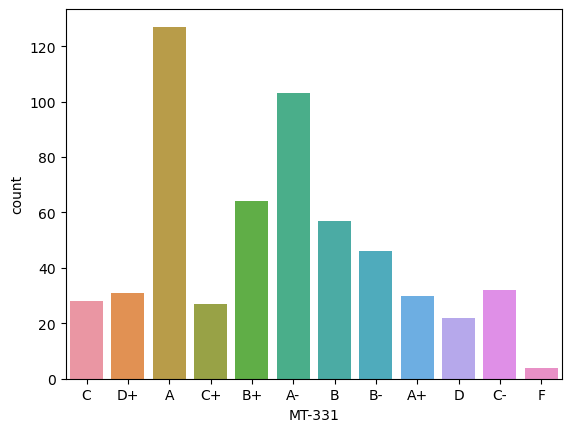

B     122
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: EF-303, dtype: int64


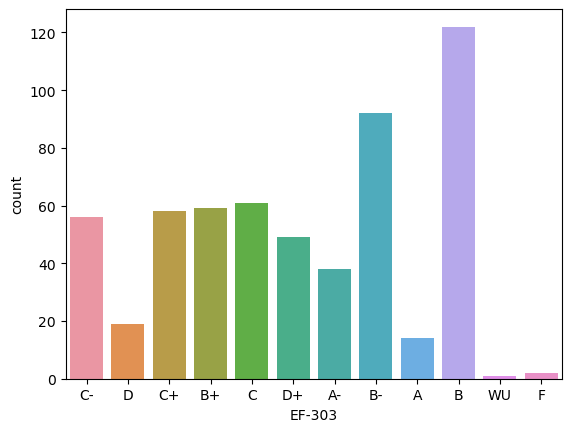

A-    138
B      72
B-     70
B+     66
C      58
C+     53
C-     33
A      28
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: HS-304, dtype: int64


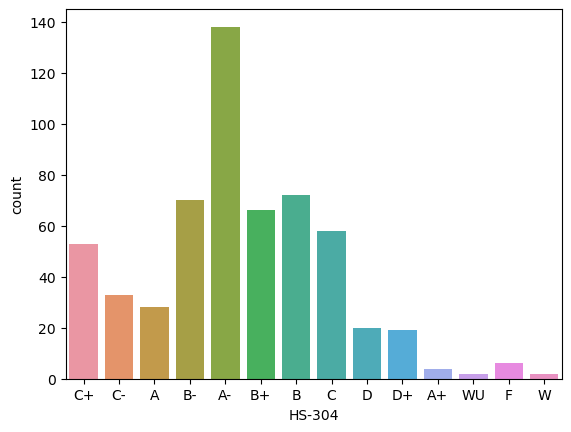

A-    118
B+     74
B      71
A      66
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: CS-301, dtype: int64


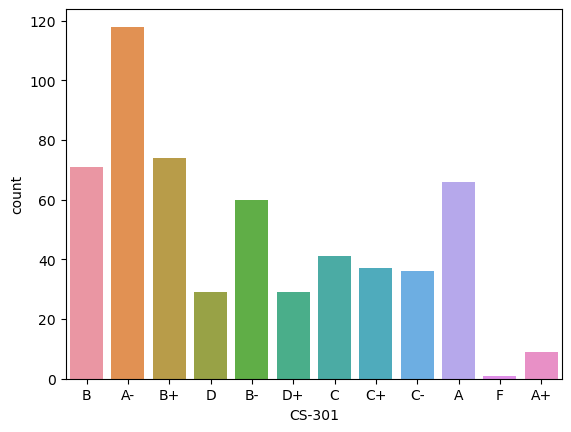

A-    123
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64


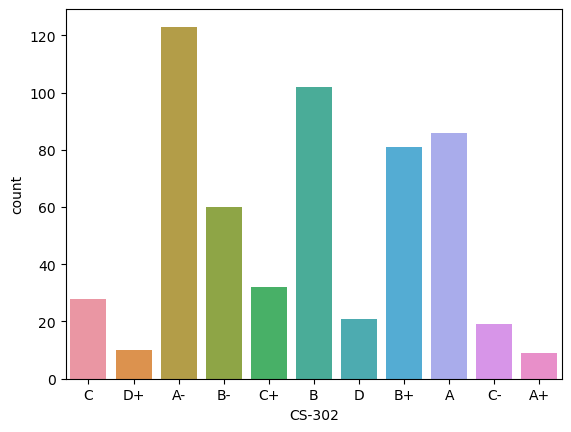

A     115
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64


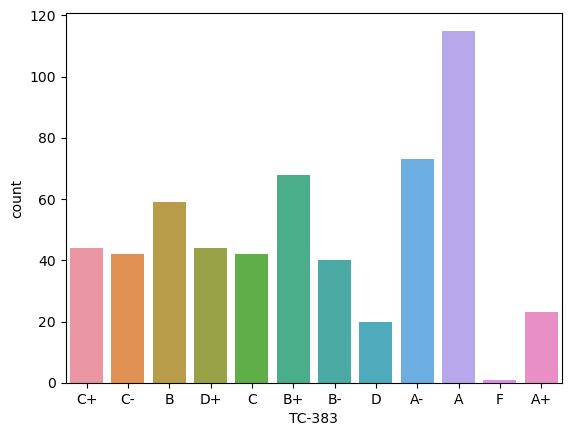

A-    150
A     130
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: MT-442, dtype: int64


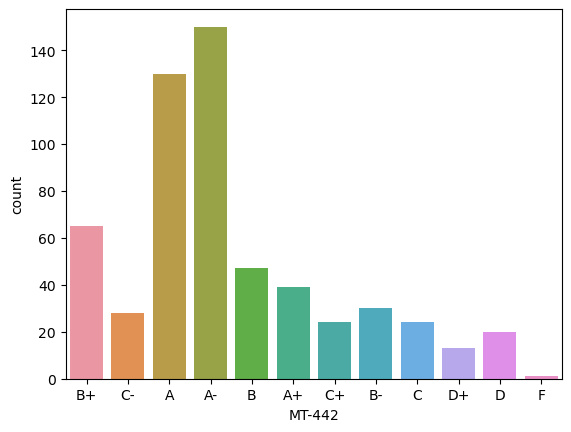

A-    105
A      76
B+     68
B      67
B-     62
C      49
C+     38
C-     32
D+     22
D      22
A+     20
F       9
WU      1
Name: EL-332, dtype: int64


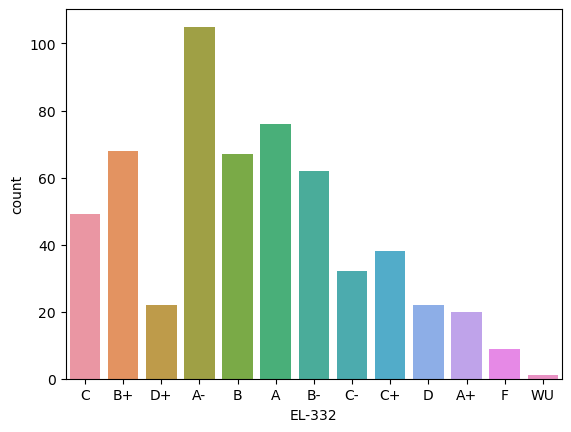

A-    98
B-    69
B     68
B+    65
C     53
C+    49
A     42
C-    40
D     36
D+    29
F     10
A+     6
WU     5
W      1
Name: CS-318, dtype: int64


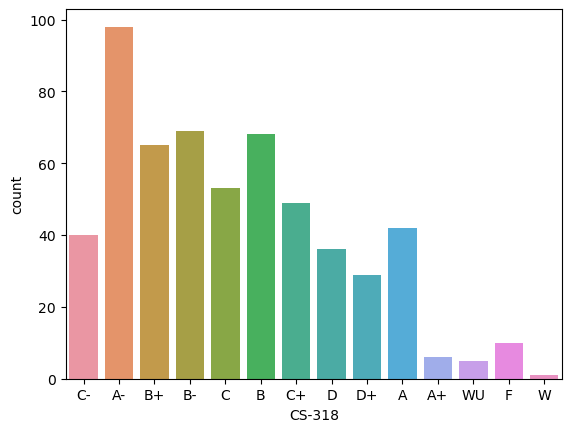

A-    129
B+     75
A      74
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64


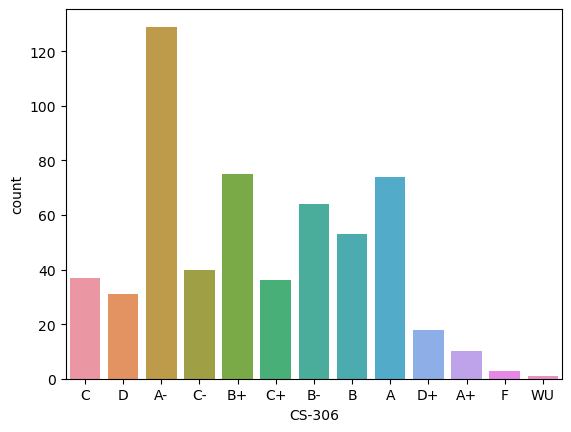

A+    103
A      86
A-     63
D+     52
C      48
C-     44
B+     42
B      37
C+     37
B-     36
D      19
F       2
W       1
WU      1
Name: CS-312, dtype: int64


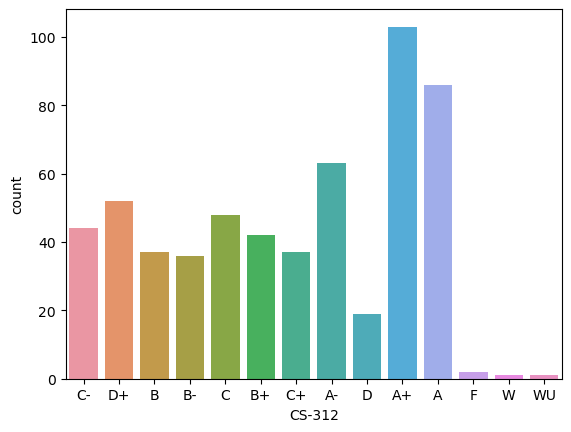

B-    91
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: CS-317, dtype: int64


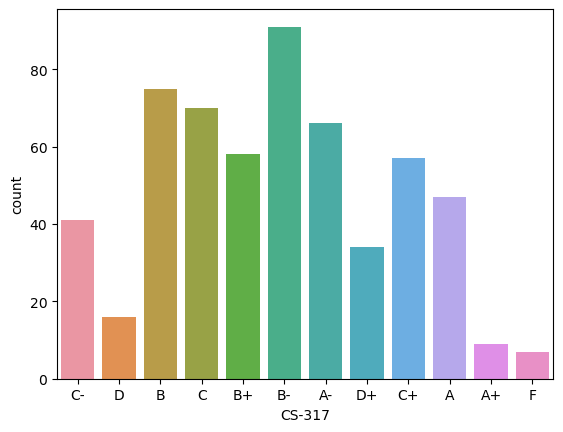

A     145
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64


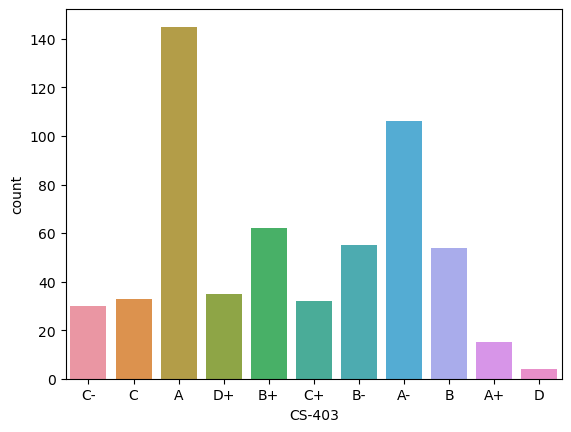

B     98
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: CS-421, dtype: int64


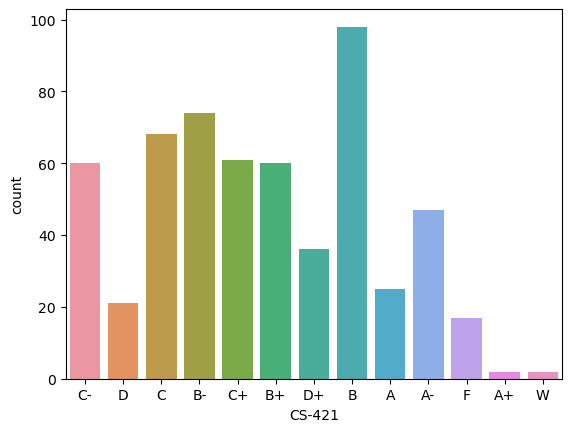

A-    262
A      79
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: CS-406, dtype: int64


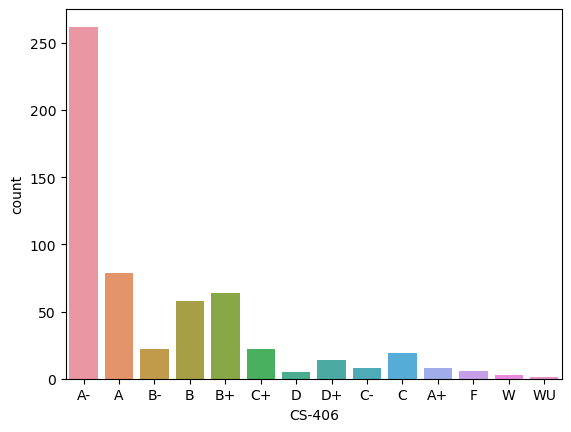

A     189
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W       2
Name: CS-414, dtype: int64


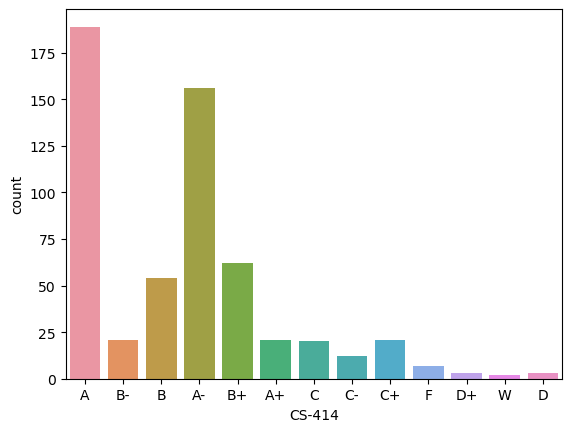

A-    133
B      89
B+     85
B-     78
A      56
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64


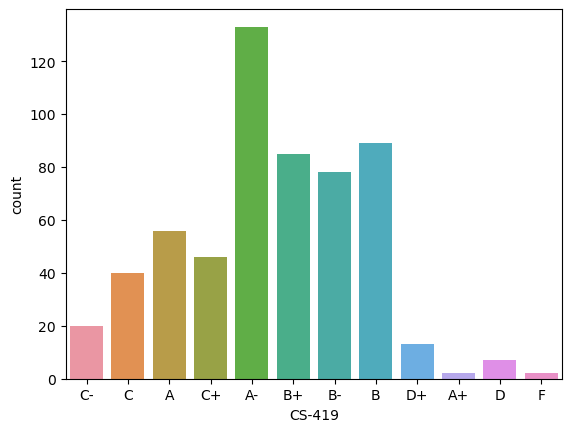

A-    136
A      78
B+     75
B      65
B-     56
C      45
C+     39
C-     29
D+     25
D      15
F       5
A+      3
Name: CS-423, dtype: int64


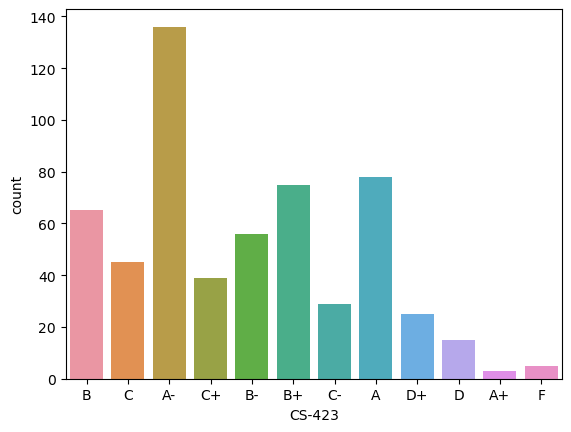

A-    236
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64


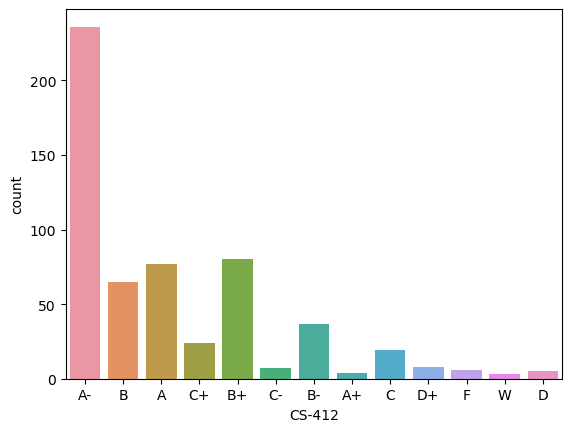

In [23]:
for i in group :
    print(df[i].value_counts())
    sns.countplot(x = df[i])
    plt.show()

In [32]:
df.drop('Seat No.' ,axis=1 , inplace = True)

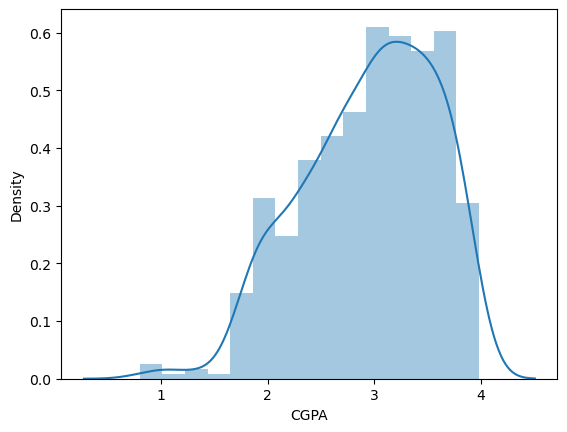

In [35]:
sns.distplot(df['CGPA'])
plt.show()

CGPA is normally distributed

# checking otliers

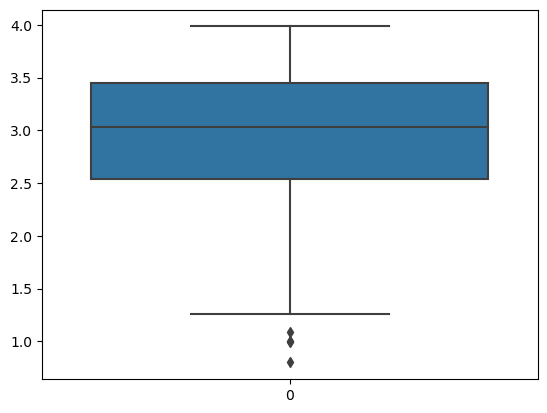

In [36]:
sns.boxplot(df['CGPA'])
plt.show()

In [46]:
#remove lower side
q1 = df['CGPA'].quantile(0.25)
q3 = df['CGPA'].quantile(0.75)
IQR = q3 - q1
lower_side = q1 -(1.5*IQR)
print(lower_side)

1.1685000000000005


In [48]:
index = np.where(df['CGPA'] < lower_side)
df = df.drop(df.index[index])

In [49]:
df.shape

(567, 42)

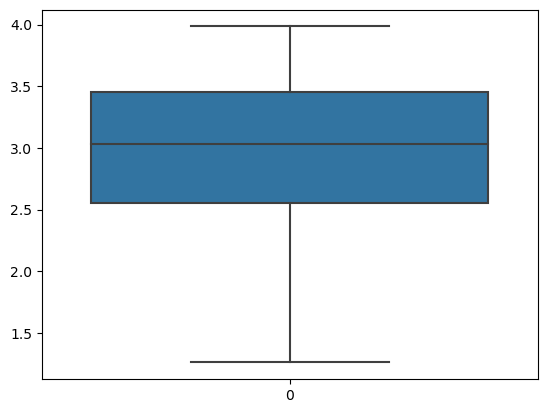

In [50]:
sns.boxplot(df['CGPA'])
plt.show()

we removed outliers

# Checking skewness

In [51]:
df.skew()

CGPA   -0.366436
dtype: float64

skewness is good as Data is normally distributed

In [53]:
#now convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
for i in group:
    df[i]= le.fit_transform(df[i])

In [56]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


# building model

In [57]:
x = df.drop('CGPA', axis=1)
y = df['CGPA']
print('features shape : ',x.shape)
print('label.shape : ',y.shape)

features shape :  (567, 41)
label.shape :  (567,)


In [58]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)
x_scaled

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.422196,1.792981,1.781525,0.566251,1.400516,2.720368,1.810762,1.363869,0.435349,1.045072,...,0.657405,1.162217,1.152205,1.527375,0.951997,-0.400724,-0.966624,1.732645,-0.350470,-0.452086
1,-1.244832,1.431452,2.472445,1.512412,0.384619,1.210384,1.810762,-1.313115,2.340003,1.366415,...,1.707402,1.757230,1.516161,0.854998,1.318449,-0.400724,1.035114,0.893696,0.721742,-0.024152
2,-1.244832,-0.737724,-0.982154,0.250863,0.045987,-1.054592,0.331897,0.025377,-0.707443,-0.882984,...,-0.742590,-0.325316,-0.667573,-1.162133,0.219095,-1.209302,-0.966624,-1.623152,-0.707874,-1.307955
3,1.755819,0.708393,2.472445,1.512412,1.739149,-0.299600,2.180479,1.363869,1.959072,0.723729,...,1.357403,1.757230,0.424294,2.199752,0.951997,0.812144,0.234419,1.313170,1.079146,1.687587
4,-0.578021,-1.099253,-0.291234,-0.064524,-1.308542,-1.054592,-0.777252,0.025377,-1.469304,-0.882984,...,-0.742590,0.269697,-0.303617,0.182621,-0.147356,-0.400724,-0.966624,-0.784203,-0.707874,-1.307955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,-0.244615,-1.822311,-0.982154,-0.695298,-0.969910,-1.054592,-0.777252,-0.643869,-1.088374,-0.240299,...,-0.042592,-0.622822,-1.031529,-1.162133,-1.979612,-1.209302,0.634766,0.054746,-0.350470,-1.307955
563,-0.911426,-1.822311,-0.982154,-1.326072,-1.308542,-1.054592,-1.516685,-0.643869,-1.469304,-1.525669,...,-0.742590,-0.027809,-0.303617,-1.162133,-1.979612,-0.400724,0.234419,-0.784203,0.721742,-0.452086
564,-0.244615,-1.822311,-0.291234,-0.064524,-1.308542,-1.054592,-1.516685,-1.313115,-1.469304,-0.561641,...,-0.042592,-0.622822,-0.667573,-1.162133,-0.513807,-1.209302,1.435461,0.054746,-0.707874,-0.452086
565,-1.244832,-0.376194,2.126985,-1.326072,1.739149,2.720368,0.331897,1.363869,0.435349,1.045072,...,-0.042592,1.459723,-0.667573,-0.153568,0.951997,2.429300,1.435461,-0.364728,0.364338,1.259652


# Checking Variance inflation factor

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['Column'] = x_scaled.columns
vif

,VIF,Column
0,2.782134,PH-121
1,1.769755,HS-101
2,2.460488,CY-105
3,2.259585,HS-105/12
4,2.613997,MT-111
5,2.320173,CS-105
6,1.947968,CS-106
7,1.945423,EL-102
8,2.164558,EE-119
9,2.289134,ME-107


As we see above there is no multicollineraity problem

# Building Model

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [64]:
#find the best random state
lr = LinearRegression()
accuracy = []
random=[]
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y ,test_size=0.3, random_state=i)
    lr.fit(x_train,y_train)
    y_pred= lr.predict(x_test)
    acc = r2_score(y_test,y_pred)
    accuracy.append(acc)
    random.append(i)

In [65]:
random_state =pd.DataFrame()
random_state['accuracy']= accuracy
random_state['n.of state']=random
random_state

,accuracy,n.of state
0,0.980388,1
1,0.968382,2
2,0.963264,3
3,0.978174,4
4,0.965522,5
...,...,...
194,0.967726,195
195,0.978639,196
196,0.976471,197
197,0.910993,198


In [66]:
random_state[random_state['accuracy']== random_state['accuracy'].max()]

,accuracy,n.of state
122,0.983988,123


accuracy is 0.983988 when number of states is 123

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y ,test_size=0.3, random_state=123)

In [71]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso , Ridge
from sklearn.svm import SVR

In [72]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
et = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
las = Lasso()
ri = Ridge()
svr = SVR()

In [73]:
models = {'LinearRegression':lr ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr}
for name , m in models.items():
    m.fit(x_train,y_train)
    pred_train = m.predict(x_train)
    pred_test= m.predict(x_test)
    print('mdel name is ',name)
    print('accuracy score on train data is ','{:.2f}'.format(r2_score(y_train,pred_train)*100),' %')
    print('accuracy score on test data is ','{:.2f}'.format(r2_score(y_test,pred_test)*100),' %')
    print('mean absolute error is ',mean_absolute_error(y_test,pred_test))
    print('mean squared error is ',mean_squared_error(y_test ,pred_test))
    print('root mean squared is , ',np.sqrt(mean_squared_error(y_test ,pred_test)))
    print('\n')

mdel name is  LinearRegression
accuracy score on train data is  95.83  %
accuracy score on test data is  98.40  %
mean absolute error is  0.05958976916869975
mean squared error is  0.0057502207855025965
root mean squared is ,  0.07583021024303306


mdel name is  RandomForestRegressor
accuracy score on train data is  98.75  %
accuracy score on test data is  93.47  %
mean absolute error is  0.11022608187134492
mean squared error is  0.023450307066666638
root mean squared is ,  0.15313493091606056


mdel name is  GradientBoostingRegressor
accuracy score on train data is  99.66  %
accuracy score on test data is  96.13  %
mean absolute error is  0.09044356286037535
mean squared error is  0.013880152348424131
root mean squared is ,  0.1178140583649682


mdel name is  ExtraTreesRegressor
accuracy score on train data is  100.00  %
accuracy score on test data is  95.88  %
mean absolute error is  0.0906782456140352
mean squared error is  0.014798484017543894
root mean squared is ,  0.12164901979

LinearRegression has the best accuracy on test data

In [74]:
from sklearn.model_selection import cross_val_score

In [77]:
models = {'LinearRegression':lr ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr}
for name , m in models.items():
    score = cross_val_score(m , x_scaled , y ,scoring='r2')
    mean= score.mean()
    print('model name is ',name)
    print('score is ',score)
    print('mean of scre is ',mean)
    print('Difference between r2 score and cross validation score is ',r2_score(y_test,m.predict(x_test)) - mean)
    print('\n')

model name is  LinearRegression
score is  [0.8803165  0.98209067 0.96596642 0.97652315 0.96413879]
mean of scre is  0.9538071047123085
Difference between r2 score and cross validation score is  0.030180770235565646


model name is  RandomForestRegressor
score is  [0.87123974 0.93635284 0.95509575 0.9360046  0.91609791]
mean of scre is  0.9229581681718256
Difference between r2 score and cross validation score is  0.011741861049852642


model name is  GradientBoostingRegressor
score is  [0.86530794 0.96052869 0.96265033 0.95213473 0.95234402]
mean of scre is  0.9385931423276375
Difference between r2 score and cross validation score is  0.022756040001871924


model name is  ExtraTreesRegressor
score is  [0.86489531 0.95621953 0.95972234 0.95097818 0.94938881]
mean of scre is  0.9362408321479012
Difference between r2 score and cross validation score is  0.022551154193178324


model name is  DecisionTreeRegressor
score is  [0.74973928 0.79311062 0.86714032 0.80250021 0.78203931]
mean of scr

RandomForestRegressor has the least cross validation value so we will use it while Lasso is not predictable for this model

In [118]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_train = rfr.predict(x_train)
pred_test= rfr.predict(x_test)
print('accuracy score on train data is ','{:.2f}'.format(r2_score(y_train,pred_train)*100),' %')
print('accuracy score on test data is ','{:.2f}'.format(r2_score(y_test,pred_test)*100),' %')
print('mean absolute error is ',mean_absolute_error(y_test,pred_test))
print('mean squared error is ',mean_squared_error(y_test ,pred_test))
print('root mean squared is , ',np.sqrt(mean_squared_error(y_test ,pred_test)))

accuracy score on train data is  98.84  %
accuracy score on test data is  93.80  %
mean absolute error is  0.10989157894736826
mean squared error is  0.022277546063157863
root mean squared is ,  0.14925664495478205


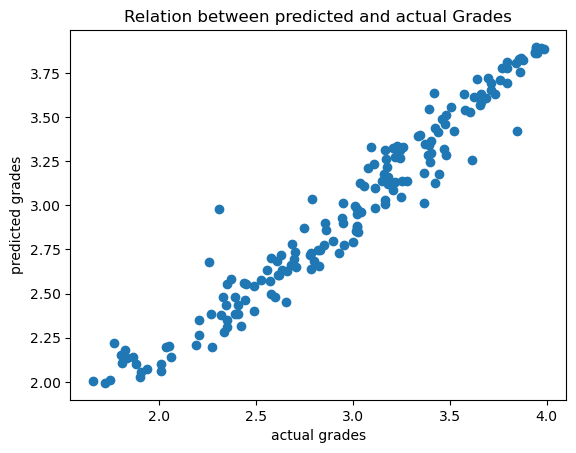

In [119]:
plt.title('Relation between predicted and actual Grades')
plt.scatter(y_test,pred_test)
plt.xlabel('actual grades')
plt.ylabel('predicted grades')
plt.show()

There is  a strong predicting relation between actual and predictive values

In [120]:
prediction = pd.DataFrame()
prediction['Actual Grade']= y_test
prediction['Predicted Grade'] = pred_test
prediction

,Actual Grade,Predicted Grade
430,3.424,3.12352
439,3.019,2.95240
249,2.785,2.72911
237,2.206,2.35203
298,2.654,2.45115
...,...,...
42,2.851,2.77571
413,2.260,2.68155
41,2.696,2.69810
560,2.370,2.58300
